# Numerical differentiation.

Remember that 

$$
f'(x)=\lim_{h\rightarrow 0} \frac{f(x+h)- f(x)}{h}
$$

what if we avoid to let $h\rightarrow 0$, but use a very small number? We can write:

$$
f'(x) \sim \frac{f(x+h)- f(x)}{h}.
$$



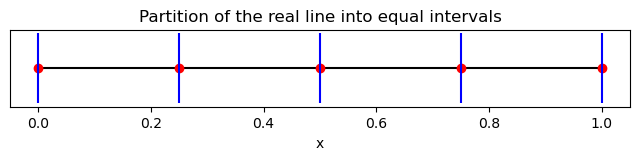

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the interval and number of partitions
a, b = 0, 1
n = 5
x = np.linspace(a, b, n)

# Plot the real line and partitions
plt.figure(figsize=(8, 1))
plt.hlines(0, a, b, colors='black')
plt.plot(x, np.zeros_like(x), 'o', color='red')
for xi in x:
    plt.vlines(xi, -0.05, 0.05, colors='blue')
plt.yticks([])
plt.xlabel('x')
plt.title('Partition of the real line into equal intervals')
plt.show()

We have used Python’s numpy library *np.linspace()* function, that partitions an interval in exactly the way that we want. The command takes the form *np.linspace(a, b, n)* where the interval is $[a,b]$ and $n$ the number of points used to create the partition. For example, *np.linspace(0,1,5)* will produce the list of numbers 0, 0.25, 0.5, 0.75, 1. Notice that there are 5 total points, the first point is $0$, the last point is $1$, and there are $4$ total sub intervals in the partition. Hence, if we want to partition the interval  into 20 equal sub intervals then we would use the command np.linspace(0,1,21) which would result in a list of numbers starting with 0, 0.05, 0.1, 0.15, etc. 

What command would you use to partition the interval $[5,10]$ into 100 equal sub intervals?

Here we have used the numpy function *linspace*. 


*Exercise:* Use different  